In [2]:
# Завантажити датасет
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


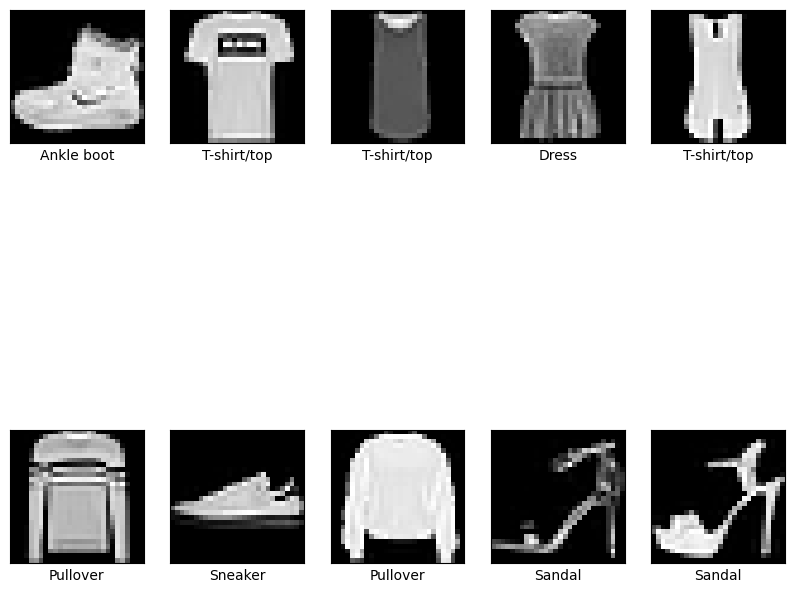

In [4]:
# Роздрукувати 10 зображень.
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap='gray')
    plt.xlabel(class_names[y_train[i]])
plt.show()


In [5]:
# Підготовувати дані, побудувати архітектуру
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# Використати ранню зупинку і зменшення швидкості для запобіганню перенавчанню.
early_stop = EarlyStopping(monitor='val_loss', patience=3, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.001)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10,
                    validation_split=0.2,
                    callbacks=[early_stop, reduce_lr])

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 55s 35ms/step - accuracy: 0.7347 - loss: 0.7208 - val_accuracy: 0.8597 - val_loss: 0.3806 - learning_rate: 0.0010
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 83s 36ms/step - accuracy: 0.8767 - loss: 0.3423 - val_accuracy: 0.8868 - val_loss: 0.3166 - learning_rate: 0.0010
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 36ms/step - accuracy: 0.8938 - loss: 0.2898 - val_accuracy: 0.8978 - val_loss: 0.2887 - learning_rate: 0.0010
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 79s 34ms/step - accuracy: 0.9064 - loss: 0.2484 - val_accuracy: 0.8946 - val_loss: 0.2907 - learning_rate: 0.0010
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 81s 33ms/step - accuracy: 0.9162 - loss: 0.2230 - val_accuracy: 0.9004 - val_loss: 0.2717 - learning_rate: 0.0010
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 85s 35ms/step - accuracy: 0.9253 - loss: 0.2017 - val_accuracy: 0.9136 - val_loss: 0.2456 - learning_rate: 0.0010
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 94s 43ms/step - accura

In [7]:
# Вивести архітектуру моделі.
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 279,968 (1.07 MB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 186,646 (729.09 KB)

In [15]:
# Зберегти модель на гугл диск.
model.save('/content/drive/MyDrive/Colab Notebooks/my_model.keras')

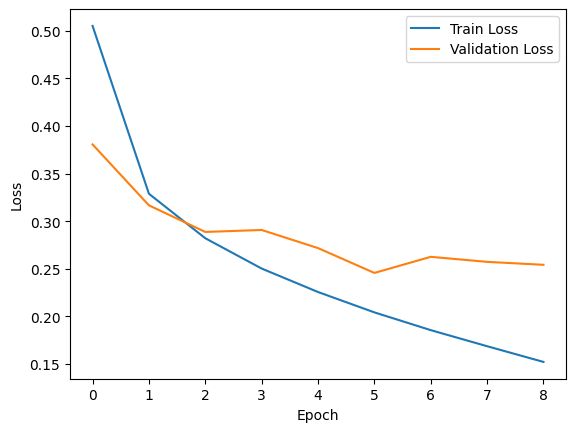

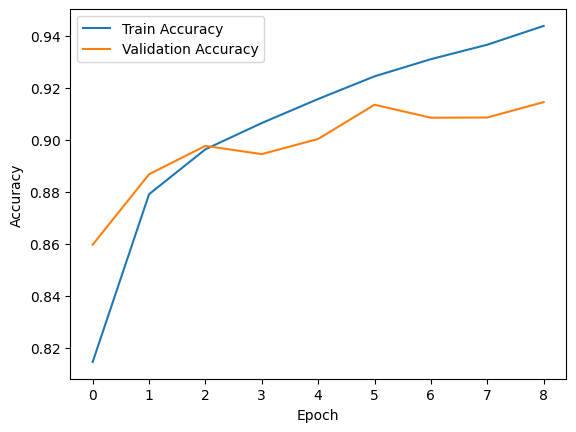

In [16]:
# Побудувати графіки функції втрат і точності для тренувальних і тестових даних.
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [17]:
# Вивести класифікаційний звіт.
y_pred = np.argmax(model.predict(x_test), axis=1)

print(classification_report(y_test, y_pred, target_names=class_names))

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.85      0.88      0.86      1000
     Trouser       0.99      0.98      0.98      1000
    Pullover       0.88      0.84      0.86      1000
       Dress       0.91      0.91      0.91      1000
        Coat       0.85      0.85      0.85      1000
      Sandal       0.98      0.97      0.98      1000
       Shirt       0.73      0.73      0.73      1000
     Sneaker       0.94      0.98      0.96      1000
         Bag       0.97      0.98      0.98      1000
  Ankle boot       0.98      0.95      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



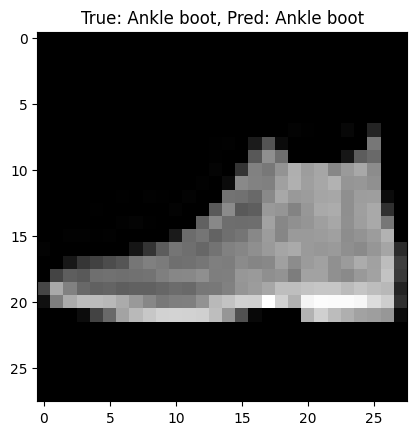

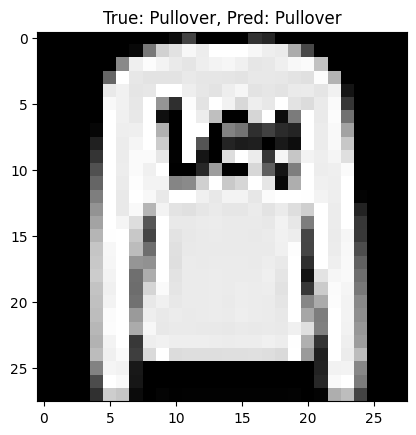

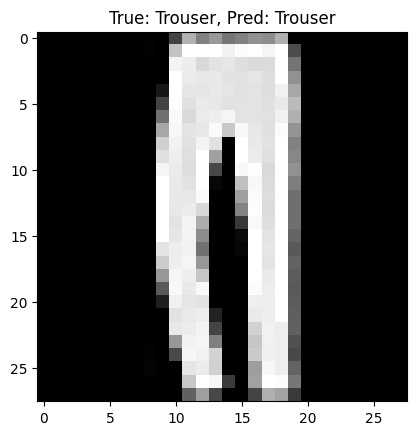

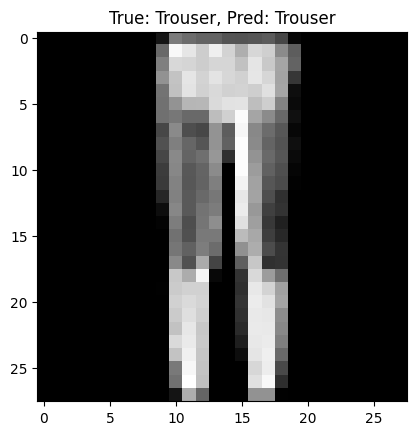

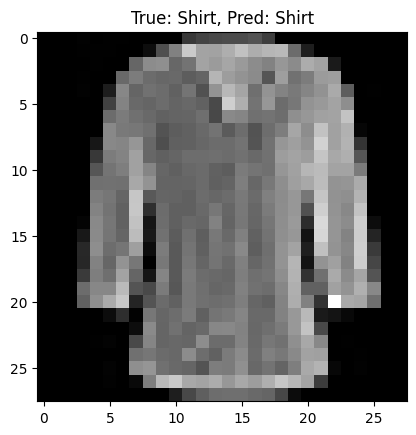

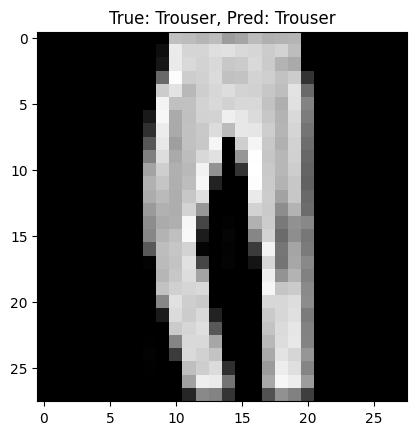

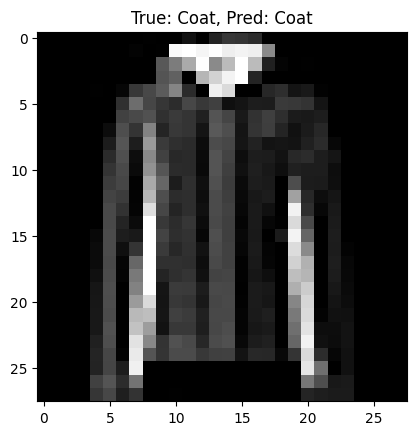

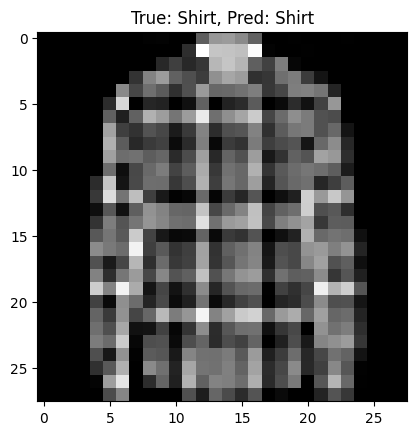

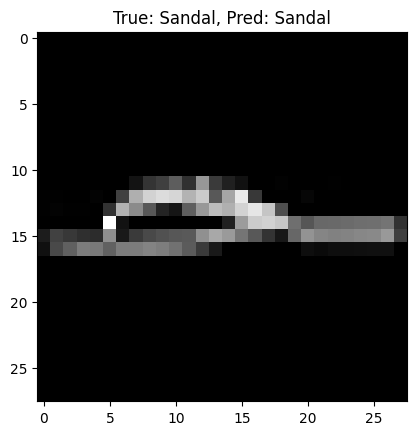

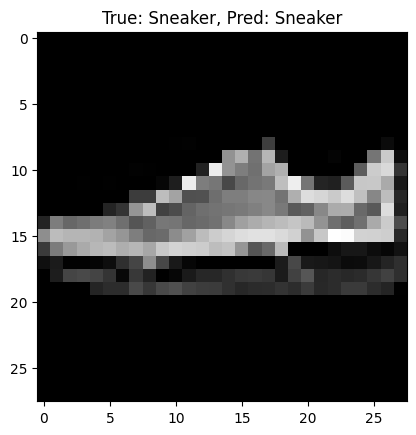

In [18]:
# Результати розпізнавання із прогнозованим і справжнім класом.
for i in range(10):
    plt.imshow(x_test[i].reshape(28,28), cmap='gray')
    plt.title(f"True: {class_names[y_test[i]]}, Pred: {class_names[y_pred[i]]}")
    plt.show()

# Новый раздел

In [20]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from kerastuner import HyperModel, RandomSearch
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
# Завантаження даних
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Нормалізація даних
x_train = x_train / 255.0
x_test = x_test / 255.0

# Додавання виміру каналу (для відповідності архітектурі)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)


<ipython-input-20-3a27ee555a52>:4: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner import HyperModel, RandomSearch


In [23]:
class FashionMNISTHyperModel(HyperModel):
    def build(self, hp):
        model = models.Sequential()

        # Додаємо перший шар Conv2D
        model.add(layers.Conv2D(
            filters=hp.Int('conv_1_filters', min_value=32, max_value=128, step=32),
            kernel_size=hp.Choice('conv_1_kernel', values=[3, 5]),
            activation='relu',
            input_shape=(28, 28, 1)))
        model.add(layers.MaxPooling2D((2, 2)))

        # Додаємо другий шар Conv2D
        model.add(layers.Conv2D(
            filters=hp.Int('conv_2_filters', min_value=32, max_value=128, step=32),
            kernel_size=hp.Choice('conv_2_kernel', values=[3, 5]),
            activation='relu'))
        model.add(layers.MaxPooling2D((2, 2)))

        # Flatten
        model.add(layers.Flatten())

        # Шар Dense
        model.add(layers.Dense(
            units=hp.Int('dense_units', min_value=64, max_value=256, step=64),
            activation='relu'))

        # Вихідний шар
        model.add(layers.Dense(10, activation='softmax'))

        # Компіляція
        model.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

        return model



In [24]:
# Використання Random Search для пошуку найкращих гіпер-параметрів
tuner = RandomSearch(
    FashionMNISTHyperModel(),
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=1,
    directory='tuner_results',
    project_name='fashion_mnist_tuning'
)

# Пошук гіперпараметрів
tuner.search(x_train, y_train, epochs=10, validation_split=0.2)

Trial 5 Complete [00h 11m 38s]
val_accuracy: 0.9128333330154419

Best val_accuracy So Far: 0.9156666398048401
Total elapsed time: 01h 56m 35s


In [25]:
# Отримання найкращої моделі
best_model = tuner.get_best_models(num_models=1)[0]

# Використання ранньої зупинки і зменшення швидкості навчання
early_stop = EarlyStopping(monitor='val_loss', patience=3, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.001)

# Тренування найкращої моделі
history_tuned = best_model.fit(x_train, y_train, epochs=10,
                               validation_split=0.2,
                               callbacks=[early_stop, reduce_lr])

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 180s 119ms/step - accuracy: 0.9663 - loss: 0.0895 - val_accuracy: 0.9087 - val_loss: 0.2986 - learning_rate: 0.0010
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 211s 125ms/step - accuracy: 0.9724 - loss: 0.0706 - val_accuracy: 0.9073 - val_loss: 0.3591 - learning_rate: 0.0010
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 190s 117ms/step - accuracy: 0.9750 - loss: 0.0650 - val_accuracy: 0.9182 - val_loss: 0.3399 - learning_rate: 0.0010
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 201s 117ms/step - accuracy: 0.9806 - loss: 0.0530 - val_accuracy: 0.9136 - val_loss: 0.3763 - learning_rate: 0.0010
Epoch 4: early stopping


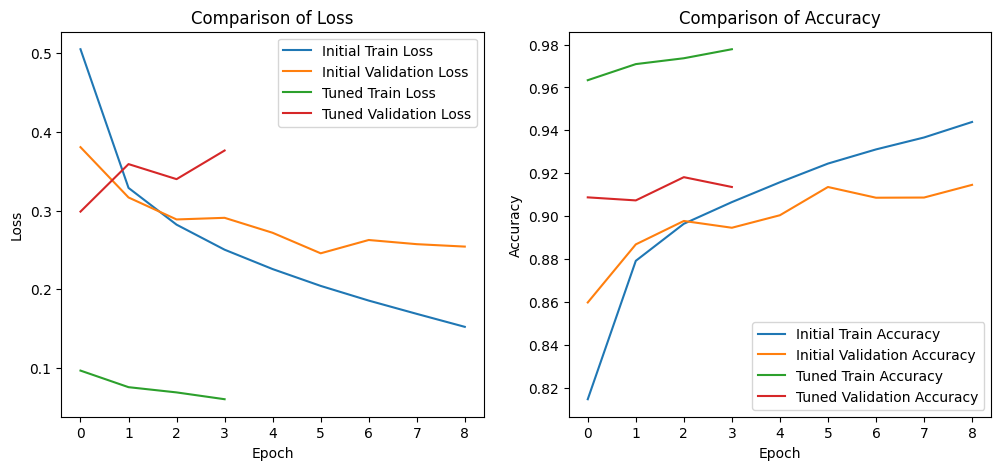

In [26]:
# Порівняння графіків втрат та точності
def plot_comparison(history1, history2):
    # Порівняння втрат
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history1.history['loss'], label='Initial Train Loss')
    plt.plot(history1.history['val_loss'], label='Initial Validation Loss')
    plt.plot(history2.history['loss'], label='Tuned Train Loss')
    plt.plot(history2.history['val_loss'], label='Tuned Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Comparison of Loss')

    # Порівняння точності
    plt.subplot(1, 2, 2)
    plt.plot(history1.history['accuracy'], label='Initial Train Accuracy')
    plt.plot(history1.history['val_accuracy'], label='Initial Validation Accuracy')
    plt.plot(history2.history['accuracy'], label='Tuned Train Accuracy')
    plt.plot(history2.history['val_accuracy'], label='Tuned Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Comparison of Accuracy')

    plt.show()

# Виклик функції для побудови графіків порівняння
plot_comparison(history, history_tuned)

In [27]:
# Прогноз для початкової та настроєної моделей
y_pred_initial = np.argmax(model.predict(x_test), axis=1)
y_pred_tuned = np.argmax(best_model.predict(x_test), axis=1)

# Класифікаційний звіт для обох моделей
print("Initial Model Classification Report:")
print(classification_report(y_test, y_pred_initial, target_names=class_names))

print("Tuned Model Classification Report:")
print(classification_report(y_test, y_pred_tuned, target_names=class_names))

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step
Initial Model Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.85      0.88      0.86      1000
     Trouser       0.99      0.98      0.98      1000
    Pullover       0.88      0.84      0.86      1000
       Dress       0.91      0.91      0.91      1000
        Coat       0.85      0.85      0.85      1000
      Sandal       0.98      0.97      0.98      1000
       Shirt       0.73      0.73      0.73      1000
     Sneaker       0.94      0.98      0.96      1000
         Bag       0.97      0.98      0.98      1000
  Ankle boot       0.98      0.95      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

Tuned Model Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.86      0

Я навчився будувати і оптимізувати багатошарову нейронну мережу для класифікації зображень за допомогою бібліотеки Keras. У першому завданні я застосував методи для запобігання перенавчанню, такі як рання зупинка і зменшення швидкості навчання, що покращило якість моделі на тестових даних. У другому завданні я використав Keras Tuner для автоматичного підбору гіперпараметрів, що дозволило досягти вищої точності та нижчої функції втрат порівняно з попередньою моделлю.